In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as st
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from mlxtend.plotting import plot_linear_regression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aliendata/final_table.csv


In [5]:
df = pd.read_csv('../input/aliendata/final_table.csv')

In [6]:
df.head()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
0,41989,191.853108,102.544295,141.588776,119.807890,0.988849,1,76.957462
1,52846,102.358126,67.553652,79.661518,76.770712,0.978181,2,80.076495
2,15997,105.261325,69.054878,83.569586,80.149531,1.032715,2,86.508208
3,8248,189.628666,90.167716,139.689556,118.206986,0.972132,1,74.242965
4,83944,199.378675,143.205239,148.036310,125.230959,1.045336,1,86.055427


In [7]:
df.describe()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,51279.300000,148.557434,79.259067,112.199544,99.571505,1.000000,1.500000,80.318250
std,30687.131383,46.172740,56.579986,33.148025,23.002214,0.076767,0.504219,8.643190
min,5231.000000,94.041680,2.288449,63.736353,65.268810,0.819985,1.000000,59.481521
25%,21306.750000,103.964557,35.458756,82.640210,79.199299,0.948430,1.000000,74.785961
50%,48646.000000,139.775917,67.698476,105.163780,94.602997,1.007066,1.500000,80.394206
75%,84009.000000,195.068280,106.108790,145.366810,122.531662,1.057895,2.000000,85.774582
max,95788.000000,209.973069,228.903939,160.599282,133.964778,1.149808,2.000000,99.544450


In [8]:
df.planet_id.replace(1, 
           "boran", 
           inplace=True)
df.planet_id.replace(2, 
           "radan", 
           inplace=True)

In [9]:
df.head()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
0,41989,191.853108,102.544295,141.588776,119.807890,0.988849,boran,76.957462
1,52846,102.358126,67.553652,79.661518,76.770712,0.978181,radan,80.076495
2,15997,105.261325,69.054878,83.569586,80.149531,1.032715,radan,86.508208
3,8248,189.628666,90.167716,139.689556,118.206986,0.972132,boran,74.242965
4,83944,199.378675,143.205239,148.036310,125.230959,1.045336,boran,86.055427


In [10]:
age_boran = df['age'][df['planet_id'] == 'boran']
age_radan = df['age'][df['planet_id'] == 'radan']

In [11]:
age_boran.mean(), age_boran.median(), age_radan.mean(), age_radan.median()

(76.41943115000001, 76.44745979999999, 84.217068798, 82.16635307000001)

In [12]:
mean_median = pd.DataFrame({'mean':[age_boran.mean(), age_radan.mean()], 'median':[age_boran.median(), age_radan.median()]})
mean_median.insert(0, "Planet",['boran', 'radan'], True)
mean_median.set_index('Planet')
mean_median

,Planet,mean,median
0,boran,76.419431,76.447460
1,radan,84.217069,82.166353


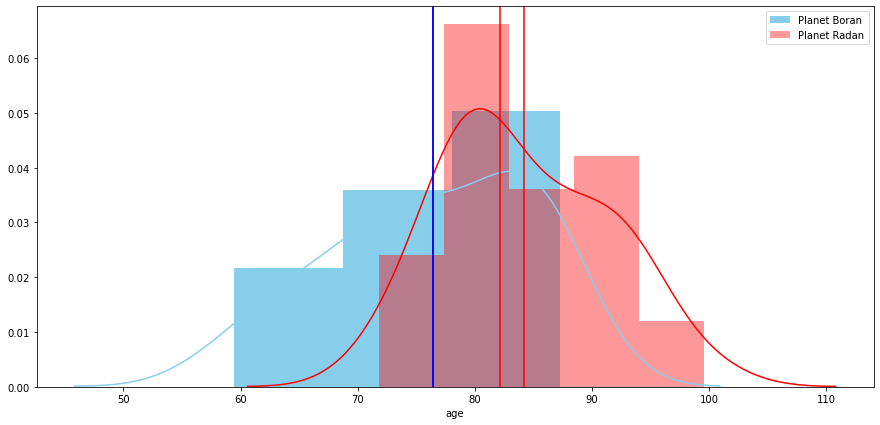

In [13]:
import seaborn as sns
plt.figure(figsize=(15,7))

sns.distplot( age_boran , color="skyblue", label="Planet Boran", hist_kws=dict(alpha=1))
sns.distplot( age_radan , color="red", label="Planet Radan")
plt.legend()
plt.axvline(age_boran.mean(), color = 'b')
plt.axvline(age_radan.mean(), color = 'r')
plt.axvline(age_boran.median(), color = 'b')
plt.axvline(age_radan.median(), color = 'r')


In [14]:
def proba(data):
    num = data.median()
    avg = data.mean()
    std = data.std()
    z_score = (num - avg) / std
    probability = round((1 - st.norm.cdf(z_score))*100)
    return probability, print(str(probability) + ' %')
proba(age_boran), proba(age_radan)

50.0 %
62.0 %


((50.0, None), (62.0, None))

Text(0.5, 1.0, 'Blood Pressure range spread')

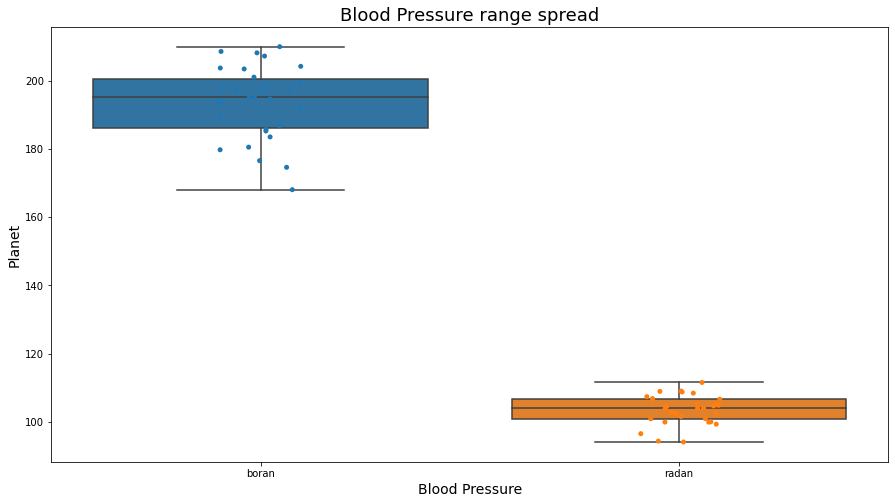

In [15]:
plt.figure(figsize=(15,8))

sns.boxplot(x=df.planet_id, y=df.blood_pressure, data=df)
sns.stripplot(x=df.planet_id, y=df.blood_pressure, data=df)
plt.ylabel("Planet", size=14)
plt.xlabel("Blood Pressure", size=14)
plt.title("Blood Pressure range spread", size=18)


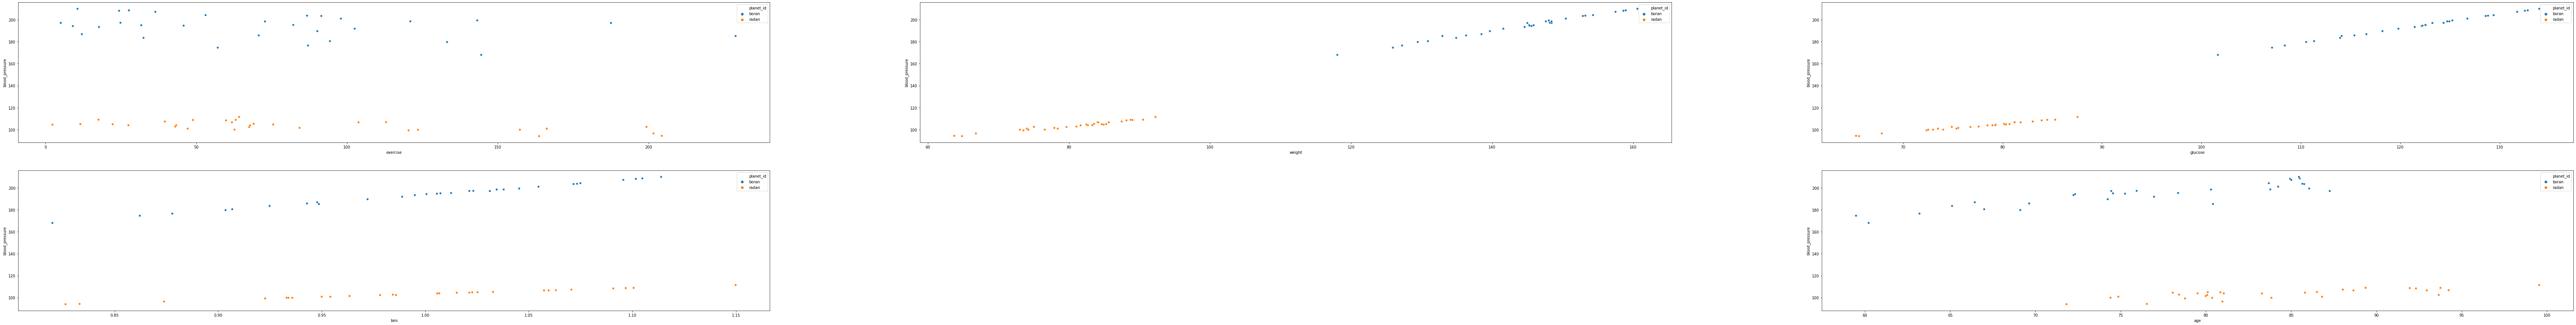

In [60]:
plt.figure(figsize=(21,15))
ax1 = plt.subplot(231)
sns.scatterplot(data=df, x="exercise", y="blood_pressure", hue="planet_id")
ax2 = plt.subplot(232)
sns.scatterplot(data=df, x="weight", y="blood_pressure", hue="planet_id")
ax3 = plt.subplot(233)
sns.scatterplot(data=df, x="glucose", y="blood_pressure", hue="planet_id")
ax4 = plt.subplot(234)
sns.scatterplot(data=df, x="bmi", y="blood_pressure", hue="planet_id")
ax5 = plt.subplot(236)
sns.scatterplot(data=df, x="age", y="blood_pressure", hue="planet_id")

In [17]:
df.head(1)

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
0,41989,191.853108,102.544295,141.588776,119.80789,0.988849,boran,76.957462


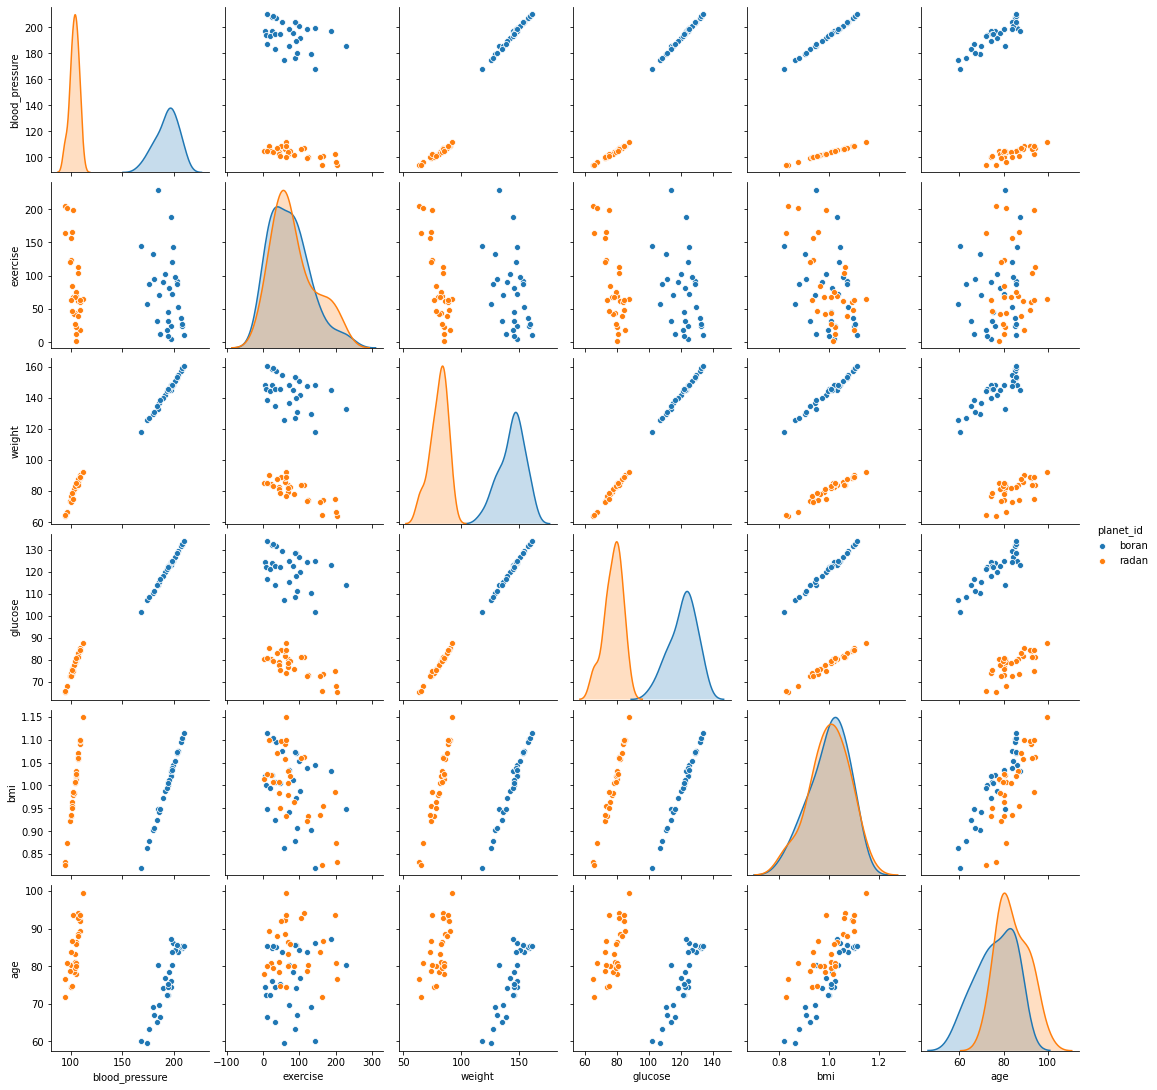

In [18]:
sns.pairplot(df.drop('patient_id', axis=1), hue="planet_id")

In [19]:
X = df[['exercise', 'weight', 'glucose', 'bmi', 'age']]
y = df['blood_pressure']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(48, 5) (48,)
(12, 5) (12,)


In [23]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
lm = LinearRegression()

In [35]:
scores = cross_val_score(lm, X_train, y_train, cv = 5)   

print(scores, np.mean(scores), np.std(scores))

[0.99999203 0.99998463 0.99998307 0.99998809 0.99998149] 0.9999858599529565 3.7793611359307464e-06


In [36]:
predictions = cross_val_predict(lm, X_test, y_test, cv = 5)

In [38]:
accuracy = metrics.r2_score(y_test, predictions)

In [46]:
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)      
lm.score(X_test, y_test)

0.9999741216300286